In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [29]:
# 1. Load data
data = yf.download("AAPL", period="1y")
data.head()

/tmp/ipykernel_48/4247811241.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", period="1y")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-11-22,228.835022,229.681201,227.033174,227.033174,38168300
2024-11-25,231.821533,232.199827,228.705636,230.417893,90152800
2024-11-26,234.001663,234.509377,232.279457,232.279457,45986200
2024-11-27,233.872238,234.628826,232.757286,233.414318,33498400
2024-11-29,236.261444,236.739279,232.916572,233.752786,28481400


In [ ]:
# 2. Create next-day close column
data["Next_Close"] = data["Close"].shift(-1)
data.dropna(inplace=True)

In [ ]:
# 3. Features and target
X = data[["Open", "High", "Low", "Volume"]]
y = data["Next_Close"]

In [ ]:
# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

In [30]:
# 5. Train Logistic regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 6. Predict
predictions = model.predict(X_test)

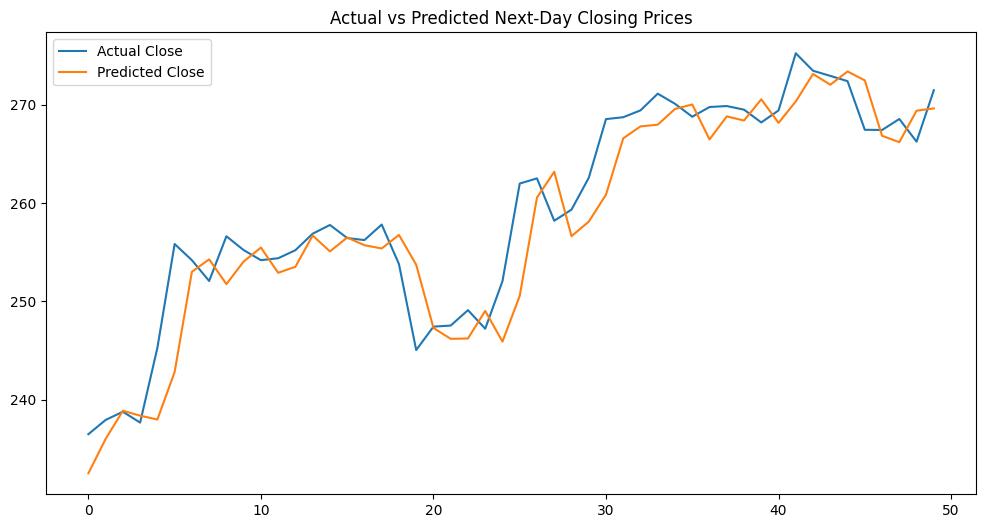

In [31]:
# 7. Plot
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Actual Close")
plt.plot(predictions, label="Predicted Close")
plt.title("Actual vs Predicted Next-Day Closing Prices")
plt.legend()
plt.show()